Zip file contains training, test and final submission csv files
Jupyter notebook contains the code in python 
change the your_local_path accordingly 

While running the code, it might take a few mins as it needs to convert the number to words for both train and test dataset

In [1]:
your_local_path = "C:/Users/sylve/Downloads/Machine learning/Dataset/Project datasets modified/datasemantics/"

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_df = pd.read_csv(your_local_path+"training_1.csv")
test_df = pd.read_csv(your_local_path+"test.csv")

In [5]:
train_df.head()

,id,category,text
0,959,0,5573 1189 4017 1207 4768 8542 17 1189 5085 5773
1,994,0,6315 7507 6700 4742 1944 2692 3647 4413 6700
2,995,0,5015 8067 5335 1615 7957 5773
3,996,0,2925 7199 1994 4647 7455 5773 4518 2734 2807 8...
4,997,0,7136 1207 6781 237 4971 3669 6193


In [6]:
test_df.head()

,id,text
0,3729,2705 4888 5050 5815 2472 5157 652 2117 2110 32...
1,3732,389 4978 315 5178 513 5249 5853 3267 315 3891 ...
2,3761,4478 4231 4858 2638 4231 867 371 686 4888 4179...
3,5,3015 1911 112 3905 825 337 315 1693 4677 825 5...
4,7,5136 3918 5153 2023 3091 4159 315 3711 1409 27...


In [36]:
train_df.loc[train_df['category'] == 1].count()

id           116
category     116
text         116
text_word    116
dtype: int64

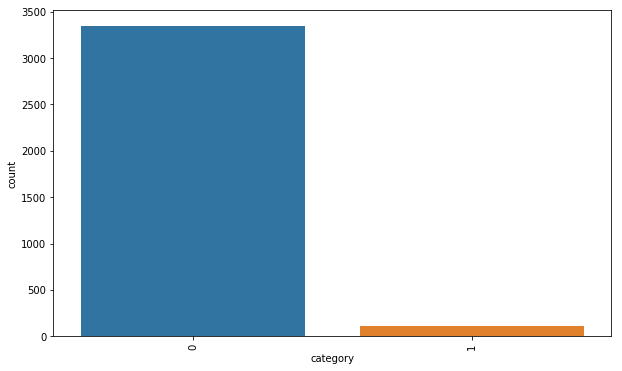

In [40]:
#Count plot to check the count of category in train dataset
plt.figure(figsize=[10,6])
plt.xticks(rotation=90)
sns.countplot(train_df.category)

plt.show()

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 3 columns):
id          3464 non-null int64
category    3464 non-null int64
text        3464 non-null object
dtypes: int64(2), object(1)
memory usage: 81.3+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 2 columns):
id      1360 non-null int64
text    1360 non-null object
dtypes: int64(1), object(1)
memory usage: 21.3+ KB


In [9]:
#Create empty attritube called 'text_word' for train dataset
train_df['text_word']='nan'

In [10]:
#convert 'text' attribute to text format and store in seperate attritube called 'text_word', so can apply NLP text analysis 

for key, value in train_df['text'].iteritems(): 
    train_df.text_word[key]=" ".join(train_df.text[key])
    train_df.text_word[key]=train_df.text_word[key].replace('1','one').replace('2','two').replace('3','three').replace('4','four').replace('5','five').replace('6','six').replace('7','seven').replace('8','eight').replace('9','nine').replace('0','zero') 
print(train_df) 

        id  category                                               text  \
0      959         0    5573 1189 4017 1207 4768 8542 17 1189 5085 5773   
1      994         0       6315 7507 6700 4742 1944 2692 3647 4413 6700   
2      995         0                      5015 8067 5335 1615 7957 5773   
3      996         0  2925 7199 1994 4647 7455 5773 4518 2734 2807 8...   
4      997         0                  7136 1207 6781 237 4971 3669 6193   
5      998         0  6730 3349 2325 7714 5773 5172 6254 4097 6500 6...   
6      999         0                                 714 4164 5672 8124   
7     1000         0       7674 4947 7671 4335 1587 6589 3669 6254 6517   
8     1001         0  326 4211 8380 7343 6084 779 8542 3485 5141 307...   
9     1002         0                        6546 6949 1309 528 784 5773   
10    1003         0  7879 3385 230 7350 2963 7473 5773 4456 941 826...   
11    1005         0                           3899 7107 6919 4676 7526   
12    1006         0     

In [11]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sylve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# Cleaning the texts
corpus = []
for i in range(0, 3464):
    review = re.sub('[^a-zA-Z]', ' ', train_df['text_word'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [13]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = train_df.iloc[:, 1].values

In [17]:
#create an instance of logestic model 
logmodel = LogisticRegression()

In [18]:
#Apply Kfolds validation on the train data and
#then applying logestic regression
#Accuracy score, confusion matrix, classification report

kfold=KFold(n_splits=10,  random_state=None, shuffle=True)

for train, val_index in kfold.split(X):
    #print("Train:", train, "Validation:", val_index) 
    X_train, X_test = X[train], X[val_index] 
    y_train, y_test = y[train], y[val_index]
    logmodel.fit(X_train, y_train)
    #predictions
    Predictions = logmodel.predict(X_test)
    print(accuracy_score(y_test,Predictions))
    cm = confusion_matrix(y_test, Predictions)
    print(cm)
    print(classification_report(y_test,Predictions))
    print()
    print("***************")

0.962536023054755
[[334   0]
 [ 13   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       334
           1       0.00      0.00      0.00        13

   micro avg       0.96      0.96      0.96       347
   macro avg       0.48      0.50      0.49       347
weighted avg       0.93      0.96      0.94       347


***************
0.9711815561959655
[[337   1]
 [  9   0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       338
           1       0.00      0.00      0.00         9

   micro avg       0.97      0.97      0.97       347
   macro avg       0.49      0.50      0.49       347
weighted avg       0.95      0.97      0.96       347


***************
0.962536023054755
[[334   2]
 [ 11   0]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       336
           1       0.00      0.00      0.00        11

   micro avg       0.96 

In [19]:
cross_val_score(logmodel, X, y)

array([0.96623377, 0.96623377, 0.96533795])

In [20]:
cross_val_predict(logmodel, X, y)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
#Create empty attritube called 'text_word' for test dataset
test_df['text_word']='nan'

In [22]:
#convert 'text' attribute to text format and store in seperate attritube called 'text_word', so can apply NLP text analysis 

for key, value in test_df['text'].iteritems(): 
    test_df.text_word[key]=" ".join(test_df.text[key])
    test_df.text_word[key]=test_df.text_word[key].replace('1','one').replace('2','two').replace('3','three').replace('4','four').replace('5','five').replace('6','six').replace('7','seven').replace('8','eight').replace('9','nine').replace('0','zero') 
print(test_df)

        id                                               text  \
0     3729  2705 4888 5050 5815 2472 5157 652 2117 2110 32...   
1     3732  389 4978 315 5178 513 5249 5853 3267 315 3891 ...   
2     3761  4478 4231 4858 2638 4231 867 371 686 4888 4179...   
3        5  3015 1911 112 3905 825 337 315 1693 4677 825 5...   
4        7  5136 3918 5153 2023 3091 4159 315 3711 1409 27...   
5      228  1235 3211 5420 4479 2743 3707 4934 2893 5600 4...   
6      236  3777 371 5420 4892 2889 2904 1177 3192 3298 17...   
7      241  3192 4793 4415 3517 2543 4960 273 4154 2023 36...   
8      251  5920 4479 4225 1392 4921 5893 2959 2462 2744 2...   
9      260  389 4978 315 4903 513 5249 5853 3267 315 3891 ...   
10     265  4435 1911 4964 5318 5333 5507 315 2272 2462 53...   
11      19  700 4255 2849 4994 3695 4362 5850 3211 886 117...   
12      21        5600 2849 5406 3560 513 4198 5702 3509 2893   
13      22  1911 2215 1961 4051 315 1413 652 4030 1640 329...   
14      23  4632 1844 215

In [23]:
corpus_1 = []
for i in range(0, 1360):
    review_1 = re.sub('[^a-zA-Z]', ' ', test_df['text_word'][i])
    review_1 = review_1.lower()
    review_1 = review_1.split()
    ps = PorterStemmer()
    review_1 = [ps.stem(word) for word in review_1 if not word in set(stopwords.words('english'))]
    review_1 = ' '.join(review_1)
    corpus_1.append(review_1)

In [24]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
c_v = CountVectorizer()
X_1 = c_v.fit_transform(corpus_1).toarray()

In [27]:
Predictions_1 = logmodel.predict(X_1)
print(Predictions_1)

[0 0 0 ... 0 0 0]


In [28]:
Predictions_1.shape

(1360,)

In [30]:
test_df['category']=pd.DataFrame(Predictions_1)

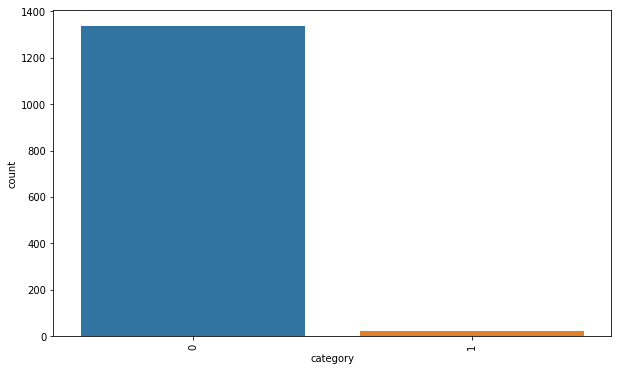

In [41]:
#Count plot to check the count of category in test dataset
plt.figure(figsize=[10,6])
plt.xticks(rotation=90)
sns.countplot(test_df.category)
plt.show()

In [46]:
test_final_df= test_df.drop(columns=['text','text_word'])

In [48]:
#Final submission.csv contains only Id and Category
test_final_df.to_csv('C:/Users/sylve/Downloads/Machine learning/Dataset/Project datasets modified/datasemantics/submission.csv', header=True, index=False) 